<a href="https://colab.research.google.com/github/Mukeshreddy3699/Mukesh_INFO5731/blob/main/Pappula_Mukesh_Exercise_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 In-class Exercise 4**

**This exercise will provide a valuable learning experience in working with text data and extracting features using various topic modeling algorithms. Key concepts such as Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA), lda2vec, and BERTopic.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 40

**Deadline**: This in-class exercise is due at the end of the day tomorrow, at 11:59 PM.

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


## Question 1 (10 Points)

**Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

In [ ]:
import nltk; nltk.download('stopwords')
!pip install pyLDAvis

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 35.7 MB/s eta 0:00:00


In [ ]:
#Importing Required libraries
import re
import numpy as np
import pandas as pd
from pprint import pprint
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
# spacy for lemmatization
import spacy
# Plotting tools
import pyLDAvis
import pyLDAvis.gensim_models  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline
# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
import pandas as pd
import re
df = pd.read_csv("https://raw.githubusercontent.com/Mukeshreddy3699/Mukesh_INFO5731/refs/heads/main/Dune_reviews.csv")
def cleanreviews(reviews):
    reviews = re.sub(r'@[A-Za-z0-9_]+', '', reviews)
    reviews = re.sub(r'#[A-Za-z0-9_]+', '', reviews)
    reviews = re.sub(r'https?:\/\/\S+', '', reviews)
    reviews = re.sub(r"www.\S+", "", reviews)
    reviews = re.sub('[()!?]', ' ', reviews)
    reviews = re.sub('\[.*?\]', ' ', reviews)
    reviews = re.sub("[^A-Za-z0-9]", " ", reviews)
    reviews = re.sub('\\n', '', reviews)
    reviews = re.sub(r'[0-9]+', '', reviews)
    return reviews
df["reviews"] = df["reviews"].apply(cleanreviews)
data = df["reviews"].values.tolist()

In [16]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

In [20]:
import nltk
from nltk.corpus import stopwords
import pandas as pd
import gensim

#download the 'stopwords' dataset from NLTK
nltk.download('stopwords')

stops = stopwords.words('english')  #Get the list of stop words
stops.extend(['from', 'subject', 're', 'edu', 'use'])

data = pd.read_csv('Dune_reviews.csv')#Load the data into a DataFrame

def tokenize(sentences):
    for sentence in sentences:
        yield gensim.utils.simple_preprocess(str(sentence), deacc=True)

#Removing stop words from tokenized texts
def remove_stops(texts):
    return [[word for word in gensim.utils.simple_preprocess(str(doc)) if word not in stops] for doc in texts]

#Get the review texts
texts = data['reviews'].values.tolist()

#Tokenize the reviews
tokens = list(tokenize(texts))

#Remove stop words
clean_tokens = remove_stops(tokens)

print(clean_tokens[:1])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[['hollywood', 'needs', 'great', 'story', 'great', 'director', 'producer', 'best', 'thing', 'studio', 'get', 'hell', 'way', 'let', 'artists', 'create', 'art', 'dune', 'part', 'creative', 'beautiful', 'tragic', 'mesmerizing', 'never', 'get', 'bored', 'anticipate', 'going', 'happen', 'next', 'read', 'book', 'nothing', 'compare', 'denis', 'villeneuve', 'continues', 'amaze', 'effort', 'puts', 'films', 'acting', 'film', 'top', 'notch', 'saw', 'imax', 'sound', 'earth', 'shattering', 'gonna', 'see', 'movie', 'see', 'largest', 'screen', 'possible']]


In [21]:
import gensim
from gensim.models.phrases import Phrases, Phraser
import spacy
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')#Download the 'stopwords' dataset from NLTK

stop_words_list = stopwords.words('english')  #Import the 'stopwords' corpus from NLTK, which includes a list of common stop words.
stop_words_list.extend(['from', 'subject', 're', 'edu', 'use'])

cleaned_reviews = [[word for word in doc if word not in stop_words_list] for doc in tokens]

#Creating bigram and trigram models
bigram_model = Phrases(cleaned_reviews, min_count=5, threshold=100)
trigram_model = Phrases(bigram_model[cleaned_reviews], threshold=100)

bigram_phraser = Phraser(bigram_model)
trigram_phraser = Phraser(trigram_model)

def process_text(texts):
    texts_nostops = [[word for word in gensim.utils.simple_preprocess(str(doc)) if word not in stop_words_list] for doc in texts]
    texts_bigrams = [bigram_phraser[doc] for doc in texts_nostops]
    texts_trigrams = [trigram_phraser[doc] for doc in texts_bigrams]
    return texts_trigrams

#Apply text processing to your data
processed_data = process_text(cleaned_reviews)

#Print the processed data from the first review.
print(processed_data[:1])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[['hollywood', 'needs', 'great', 'story', 'great', 'director', 'producer', 'best', 'thing', 'studio', 'get', 'hell', 'way', 'let', 'artists_create', 'art', 'dune', 'part', 'creative', 'beautiful', 'tragic', 'mesmerizing', 'never', 'get', 'bored', 'anticipate', 'going', 'happen', 'next', 'read', 'book', 'nothing', 'compare', 'denis', 'villeneuve', 'continues', 'amaze', 'effort', 'puts', 'films', 'acting', 'film', 'top', 'notch', 'saw', 'imax', 'sound', 'earth_shattering', 'gonna', 'see', 'movie', 'see', 'largest', 'screen', 'possible']]


In [22]:
from gensim import corpora

dictionary = corpora.Dictionary(processed_data)
corpus = [dictionary.doc2bow(text) for text in processed_data]

print([[(dictionary[idx], freq) for idx, freq in doc] for doc in corpus[:1]])
print(dictionary[0])

[[('acting', 1), ('amaze', 1), ('anticipate', 1), ('art', 1), ('artists_create', 1), ('beautiful', 1), ('best', 1), ('book', 1), ('bored', 1), ('compare', 1), ('continues', 1), ('creative', 1), ('denis', 1), ('director', 1), ('dune', 1), ('earth_shattering', 1), ('effort', 1), ('film', 1), ('films', 1), ('get', 2), ('going', 1), ('gonna', 1), ('great', 2), ('happen', 1), ('hell', 1), ('hollywood', 1), ('imax', 1), ('largest', 1), ('let', 1), ('mesmerizing', 1), ('movie', 1), ('needs', 1), ('never', 1), ('next', 1), ('notch', 1), ('nothing', 1), ('part', 1), ('possible', 1), ('producer', 1), ('puts', 1), ('read', 1), ('saw', 1), ('screen', 1), ('see', 2), ('sound', 1), ('story', 1), ('studio', 1), ('thing', 1), ('top', 1), ('tragic', 1), ('villeneuve', 1), ('way', 1)]]
acting


In [23]:
from gensim import corpora, models
from pprint import pprint
dictionary = corpora.Dictionary(processed_data)
corpus = [dictionary.doc2bow(text) for text in processed_data]
#creating an LDA_model
lda = models.LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=20,
    random_state=100,
    update_every=1,
    chunksize=100,
    passes=10,
    alpha='auto',
    per_word_topics=True
)
pprint(lda.print_topics())
doc_topics = [lda[doc] for doc in corpus]

[(0,
  '0.029*"part" + 0.020*"one" + 0.019*"dune" + 0.019*"like" + 0.017*"movie" + '
  '0.015*"still" + 0.014*"felt" + 0.012*"paul" + 0.010*"first" + '
  '0.008*"story"'),
 (1,
  '0.042*"fremen" + 0.031*"never" + 0.021*"time" + 0.021*"exact" + '
  '0.021*"worms" + 0.021*"paul" + 0.021*"first" + 0.021*"emperor" + '
  '0.021*"much" + 0.021*"like"'),
 (2,
  '0.024*"film" + 0.024*"see" + 0.018*"imax" + 0.012*"way" + 0.012*"early" + '
  '0.012*"movie" + 0.012*"new" + 0.012*"spectacle" + 0.012*"fantastic" + '
  '0.012*"filmmaking"'),
 (3,
  '0.048*"well" + 0.032*"one" + 0.032*"movie" + 0.032*"part" + 0.032*"made" + '
  '0.032*"much" + 0.032*"last" + 0.016*"fight" + 0.016*"imax" + '
  '0.016*"atreides"'),
 (4,
  '0.001*"seemed" + 0.001*"showing" + 0.001*"reviewed" + 0.001*"reviews" + '
  '0.001*"seem" + 0.001*"pugh" + 0.001*"shared" + 0.001*"somehow" + '
  '0.001*"slight_disappointment" + 0.001*"public"'),
 (5,
  '0.035*"get" + 0.035*"see" + 0.035*"great" + 0.018*"next" + 0.018*"part" + '
  '

In [25]:
from gensim.models import CoherenceModel

#coherence score for the LDA model
coherence_model = CoherenceModel(model=lda, texts=processed_data, dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model.get_coherence()
print('Coherence Score:', coherence_score)
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Calculate coherence values for LDA models with varying numbers of topics.
    """
    coherence_scores = []
    lda_models = []
    for num_topics in range(start, limit, step):
        lda_model = gensim.models.LdaModel(
            corpus=corpus,
            id2word=dictionary,
            num_topics=num_topics,
            random_state=100,
            update_every=1,
            chunksize=100,
            passes=10,
            alpha='auto',
            per_word_topics=True
        )
        lda_models.append(lda_model)
        coherence_model = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_scores.append(coherence_model.get_coherence())
    return lda_models, coherence_scores
start, limit, step = 2, 20, 2
lda_model_list, coherence_values = compute_coherence_values(
    dictionary=dictionary,
    corpus=corpus,
    texts=processed_data,
    start=start,
    limit=limit,
    step=step
)
formatted_coherence_values = [round(cv, 4) for cv in coherence_values]
for num_topics, coherence_value in zip(range(start, limit, step), formatted_coherence_values):
    print(f"Num Topics = {num_topics} has Coherence Value of {coherence_value}")

average_coherence = sum(formatted_coherence_values) / len(formatted_coherence_values)
print(average_coherence)

Coherence Score: 0.4210601601254436


Num Topics = 2 has Coherence Value of 0.2823
Num Topics = 4 has Coherence Value of 0.2572
Num Topics = 6 has Coherence Value of 0.2788
Num Topics = 8 has Coherence Value of 0.2824
Num Topics = 10 has Coherence Value of 0.3465
Num Topics = 12 has Coherence Value of 0.3911
Num Topics = 14 has Coherence Value of 0.3885
Num Topics = 16 has Coherence Value of 0.4619
Num Topics = 18 has Coherence Value of 0.426
0.34607777777777776


In [26]:
optimal_model = lda_model_list[3]

#Get the topics of the chosen LDA model
model_topics = optimal_model.show_topics(formatted=False)

#Print the top 10 words for each topic in the LDA model
for topic_num, topic_word_probs in model_topics:
    topic_words = [word for word, prob in topic_word_probs]
    print(f"Topic {topic_num + 1}: {', '.join(topic_words)}")

Topic 1: movie, part, like, one, dune, felt, paul, still, first, story
Topic 2: movie, film, first, one, part, time, better, even, story, like
Topic 3: best, one, liked, book, well, time, first, even, personally, fantastic
Topic 4: film, movie, story, part, dune, every, well, much, way, denis
Topic 5: movie, book, movies, first, paul, part, jessica, dune, think, people
Topic 6: movie, see, great, film, book, time, dune, get, like, best
Topic 7: character, paul, chani, movie, one, religious, much, dune, like, becomes
Topic 8: movie, like, jessica, paul, reverend, good, fremen, movies, acting, almost


## Question 2 (10 Points)

**Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

In [35]:
import os.path
from gensim import corpora
from gensim.models import LsiModel
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

#function for preprocess data
def preprocess_data(doc_set):
    tokenizer = RegexpTokenizer(r'\w+')
    stop = set(stopwords.words('english'))
    pstemmer = PorterStemmer()
    texts = []
    for doc in doc_set:
        raw = doc.lower()
        tokens = tokenizer.tokenize(raw)
        stopped_tokens = [token for token in tokens if token not in stop]
        stemmed_tokens = [pstemmer.stem(token) for token in stopped_tokens]
        texts.append(stemmed_tokens)
    return texts
preprocess_data(data)

[['review']]

In [28]:
def prepare_corpus(doc_clean):
    dictionary = corpora.Dictionary(doc_clean)
    doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
    return dictionary,doc_term_matrix

In [29]:
number_of_topics=10
words=15
def create_gensim_lsa_model(doc_clean,number_of_topics,words):
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    #generate LSA model
    lsamodel = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # train model
    print(lsamodel.print_topics(num_topics=number_of_topics, num_words=words))
    return lsamodel

In [30]:
#function for compute_coherence_values
def compute_coherence_values(dictionary, doc_term_matrix, doc_clean, stop, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, stop, step):
        model = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # train model
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=doc_clean, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

In [31]:
def plot_graph(doc_clean,start, stop, step):
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    model_list, coherence_values = compute_coherence_values(dictionary, doc_term_matrix,doc_clean,
                                                            stop, start, step)
    x = range(start, stop, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Number of Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.show()

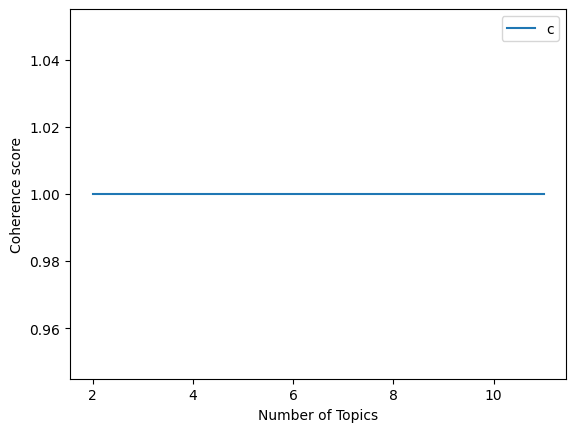

In [32]:
start,stop,step=2,12,1
plot_graph(preprocess_data(data),start,stop,step)

In [33]:
model=create_gensim_lsa_model(preprocess_data(data),number_of_topics,words)

[(0, '1.000*"review"')]


## Question 3 (10 points):
**Generate K topics by using lda2vec, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://nbviewer.org/github/cemoody/lda2vec/blob/master/examples/twenty_newsgroups/lda2vec/lda2vec.ipynb

In [40]:
!pip install pyLDAvis

In [41]:
import nltk
import pyLDAvis

nltk.download('all')
!pip install preprocess

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

pyLDAvis.enable_notebook()

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

In [42]:
import numpy as np
top_word_count = 10
top_words_per_topic = {}
#Loop through the topics and their associated words.
for topic_index, row in df.iterrows():
    words_associated_to_topic = row['reviews']
    top_words_indices = np.argsort(words_associated_to_topic)[::-1][:top_word_count]
    top_words_list = [row['reviews'].split(',')[i].strip()[:35] for i in top_words_indices]
    message = f"Topic {topic_index} top words: {', '.join(top_words_list)}"
    print(message)
    #Store the top words for the current topic in the dictionary.
    top_words_per_topic[topic_index] = top_words_list


Topic 0 top words: This is what Hollywood needs  A gre
Topic 1 top words: I m going to write this as a review
Topic 2 top words: Had the pleasure to watch this film
Topic 3 top words: Phenomenal stuff  I ll probably cal
Topic 4 top words: If you liked or loved the first one
Topic 5 top words: As with the first film  the product
Topic 6 top words: This is the kind of movie that is i
Topic 7 top words: This was a perfect sequel to Denis 
Topic 8 top words: A monumental piece of cinema Paced 
Topic 9 top words: I have to start by saying that I ab
Topic 10 top words: I just got out of an early access s
Topic 11 top words: Dune Part  is an epic movie  slickl
Topic 12 top words: As a sci fi enthusiast  I approache
Topic 13 top words: As an avid movie fan I see plenty o
Topic 14 top words: It was a visual spectacle and refre
Topic 15 top words: The movie picks up right where the 
Topic 16 top words: Visually and musically stunning lik
Topic 17 top words: We have waited many  many years for
To

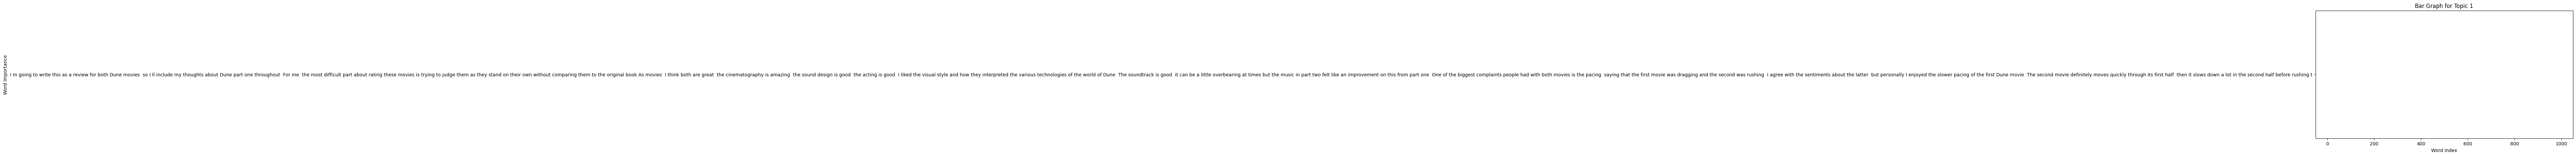

In [46]:
import matplotlib.pyplot as plt

topic_index = 1

num_words_to_plot = 1000

topic_words = df.reviews.tolist()[topic_index][:num_words_to_plot]
plt.figure(figsize=(10, 5))
plt.bar(range(len(topic_words)), topic_words)
plt.title(f"Bar Graph for Topic {topic_index}")
plt.xlabel("Word Index")
plt.ylabel("Word Importance")
plt.show()


## Question 4 (10 points):
**Generate K topics by using BERTopic, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://colab.research.google.com/drive/1FieRA9fLdkQEGDIMYl0I3MCjSUKVF8C-?usp=sharing

In [48]:
# Write your code here
!pip install bertopic


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.7/143.7 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 50.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.8/255.8 kB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 5.0 MB/s eta 0:00:00


In [49]:
from bertopic import BERTopic
import pandas as xy
df = xy.read_csv("Dune_reviews.csv")  #Load the CSV file into a DataFrame
b_model = BERTopic(language="english", calculate_probabilities=True, verbose=True)   # Create a BERTopic model with specific configuration settings
t_vectors, t_probs = b_model.fit_transform(df['reviews'])
t_info = b_model.get_topic_info()
t_info_display = t_info.head(20).to_string()
print(t_info_display)


2024-10-30 05:59:20,946 - BERTopic - Embedding - Transforming documents to embeddings.


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/32 [00:00<?, ?it/s]

2024-10-30 06:01:41,017 - BERTopic - Embedding - Completed ✓
2024-10-30 06:01:41,020 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-10-30 06:01:59,853 - BERTopic - Dimensionality - Completed ✓
2024-10-30 06:01:59,858 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-10-30 06:02:00,088 - BERTopic - Cluster - Completed ✓
2024-10-30 06:02:00,114 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-10-30 06:02:00,705 - BERTopic - Representation - Completed ✓


    Topic  Count                                    Name                                                                                             Representation                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [50]:
#Specify the topic ID to retrieve specific topic information
t_id = -1
#Get information about the specified topic
s_t = b_model.get_topic(t_id)
s_t


False

In [51]:
#Plotting a graph
b_model.visualize_term_rank()
b_model.update_topics(df.reviews.tolist(), n_gram_range=(1, 2))
b_model.visualize_term_rank()


## **Question 3 (Alternative) - (10 points)**

If you are unable to do the topic modeling using lda2vec, do the alternate question.

Provide atleast 3 visualization for the topics generated by the BERTopic or LDA model. Explain each of the visualization in detail.

In [ ]:
# Write your code here
# Then Explain the visualization

# Repeat for the other 2 visualizations as well.

## Extra Question (5 Points)

**Compare the results generated by the four topic modeling algorithms, which one is better? You should explain the reasons in details.**

**This question will compensate for any points deducted in this exercise. Maximum marks for the exercise is 40 points.**

In [54]:
# Write your code here
In the LDA algorithm, the main inputs are the dictionary (vocabulary) and the corpus (collection of documents).
The number of topics needs to be specified as a parameter. Tools like pyLDAvis can help visualize and compare the topics generated by LDA for different topic numbers.
LDA is generally considered to perform better than LSA for topic modeling tasks.
training LSA is much simpler compared to BERT, as LSA operates on less intensive data and is easier to understand conceptually.
LSA's approach, based on linear algebra techniques like singular value decomposition.
BERT involves complex deep learning architectures for pre-training, making it considerably more challenging.

SyntaxError: unterminated string literal (detected at line 6) (<ipython-input-54-5f92940e241c>, line 6)

# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.

Consider the following points in your response:

**Learning Experience:** Describe your overall learning experience in working with text data and extracting features using various topic modeling algorithms. Did you understand these algorithms and did the implementations helped in grasping the nuances of feature extraction from text data.

**Challenges Encountered:** Were there specific difficulties in completing this exercise?

Relevance to Your Field of Study: How does this exercise relate to the field of NLP?

**(Your submission will not be graded if this question is left unanswered)**



In [53]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''
Please write you answer here:


This excersice purely based on traing in built py models and evaluating their performance it took considerable amount of time to understand code and execute the programs and fix errors.
In this exercise, topic modeling algorithms such as LDA and LSA—basic methods in Natural Language Processing (NLP) for identifying semantic structures and identifying relevant topics from massive text corpora are applied.




'''

'\nPlease write you answer here:\n\n\nThis excersice purely based on traing in built py models and evaluating their performance it took considerable amount of time to understand code and execute the programs and fix errors.\nIn this exercise, topic modeling algorithms such as LDA and LSA—basic methods in Natural Language Processing (NLP) for identifying semantic structures and identifying relevant topics from massive text corpora are applied.\n\n\n\n\n'